In [3]:
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rcParams

from sklearn import model_selection
from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score
from sklearn.metrics import f1_score, confusion_matrix, precision_recall_curve, roc_curve
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix


import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go

import warnings
warnings.filterwarnings(action='ignore')

In [4]:
df=pd.read_csv("diabetes.csv")

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
df.head(10)

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   
5            5      116             74              0        0  25.6   
6            3       78             50             32       88  31.0   
7           10      115              0              0        0  35.3   
8            2      197             70             45      543  30.5   
9            8      125             96              0        0   0.0   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  
5                     0.201   30        0  
6                     0.248   26        1  
7                     0.134   29        0  
8                     0.158   53        1  
9                     0.232   54        1

In [7]:
df.tail()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
763                     0.171   63        0  
764                     0.340   27        0  
765                     0.245   30        0  
766                     0.349   47        1  
767                     0.315   23        0

A patient having an insulin level or skin thickness measurement of zero would indicate a significant medical issue. 
Therefore, it is reasonable to infer that the dataset uses zero as a placeholder for missing or null values.
Upon examining the dataset, it becomes evident that up to half of the rows include columns with missing data.

In [9]:
df.shape

(768, 9)

In [10]:
#Checking for data description.
df.describe()

Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.000000                  0.078000   21.000000    0.000000  
25%     27.300000                  0.243750   24.000000    0.000000  
50%     32.000000                  0.372500   29.000000    0.000000  
75%     36.600000                  0.626250   41.000000    1.000000  
max     67.100000                  2.420000   81.000000    1.000000

In [11]:
#Checking for missing value
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

Its clearly shows there are no missing values in the dataset which is cool!

In [13]:
df.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

# Data Visualization

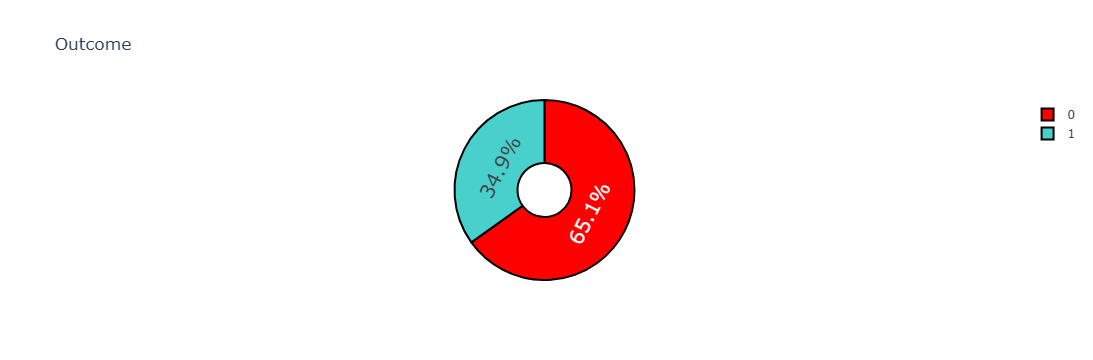

In [15]:
colors = ['red', 'mediumturquoise']
labels = ['0','1']
values = df['Outcome'].value_counts()/df['Outcome'].shape[0]

# Use `hole` to create a donut-like pie chart
fig = go.Figure(data=[go.Pie(labels=labels, values=values, hole=.3)])
fig.update_traces(hoverinfo='label+percent', textinfo='percent', textfont_size=20,
                  marker=dict(colors=colors, line=dict(color='#000000', width=2)))
fig.update_layout(
    title_text="Outcome")
fig.show()

Checking Outliers and Removing them from the dataset

In [17]:
feature_columns = [rname for rname in df.loc[:,:'Age'].columns]

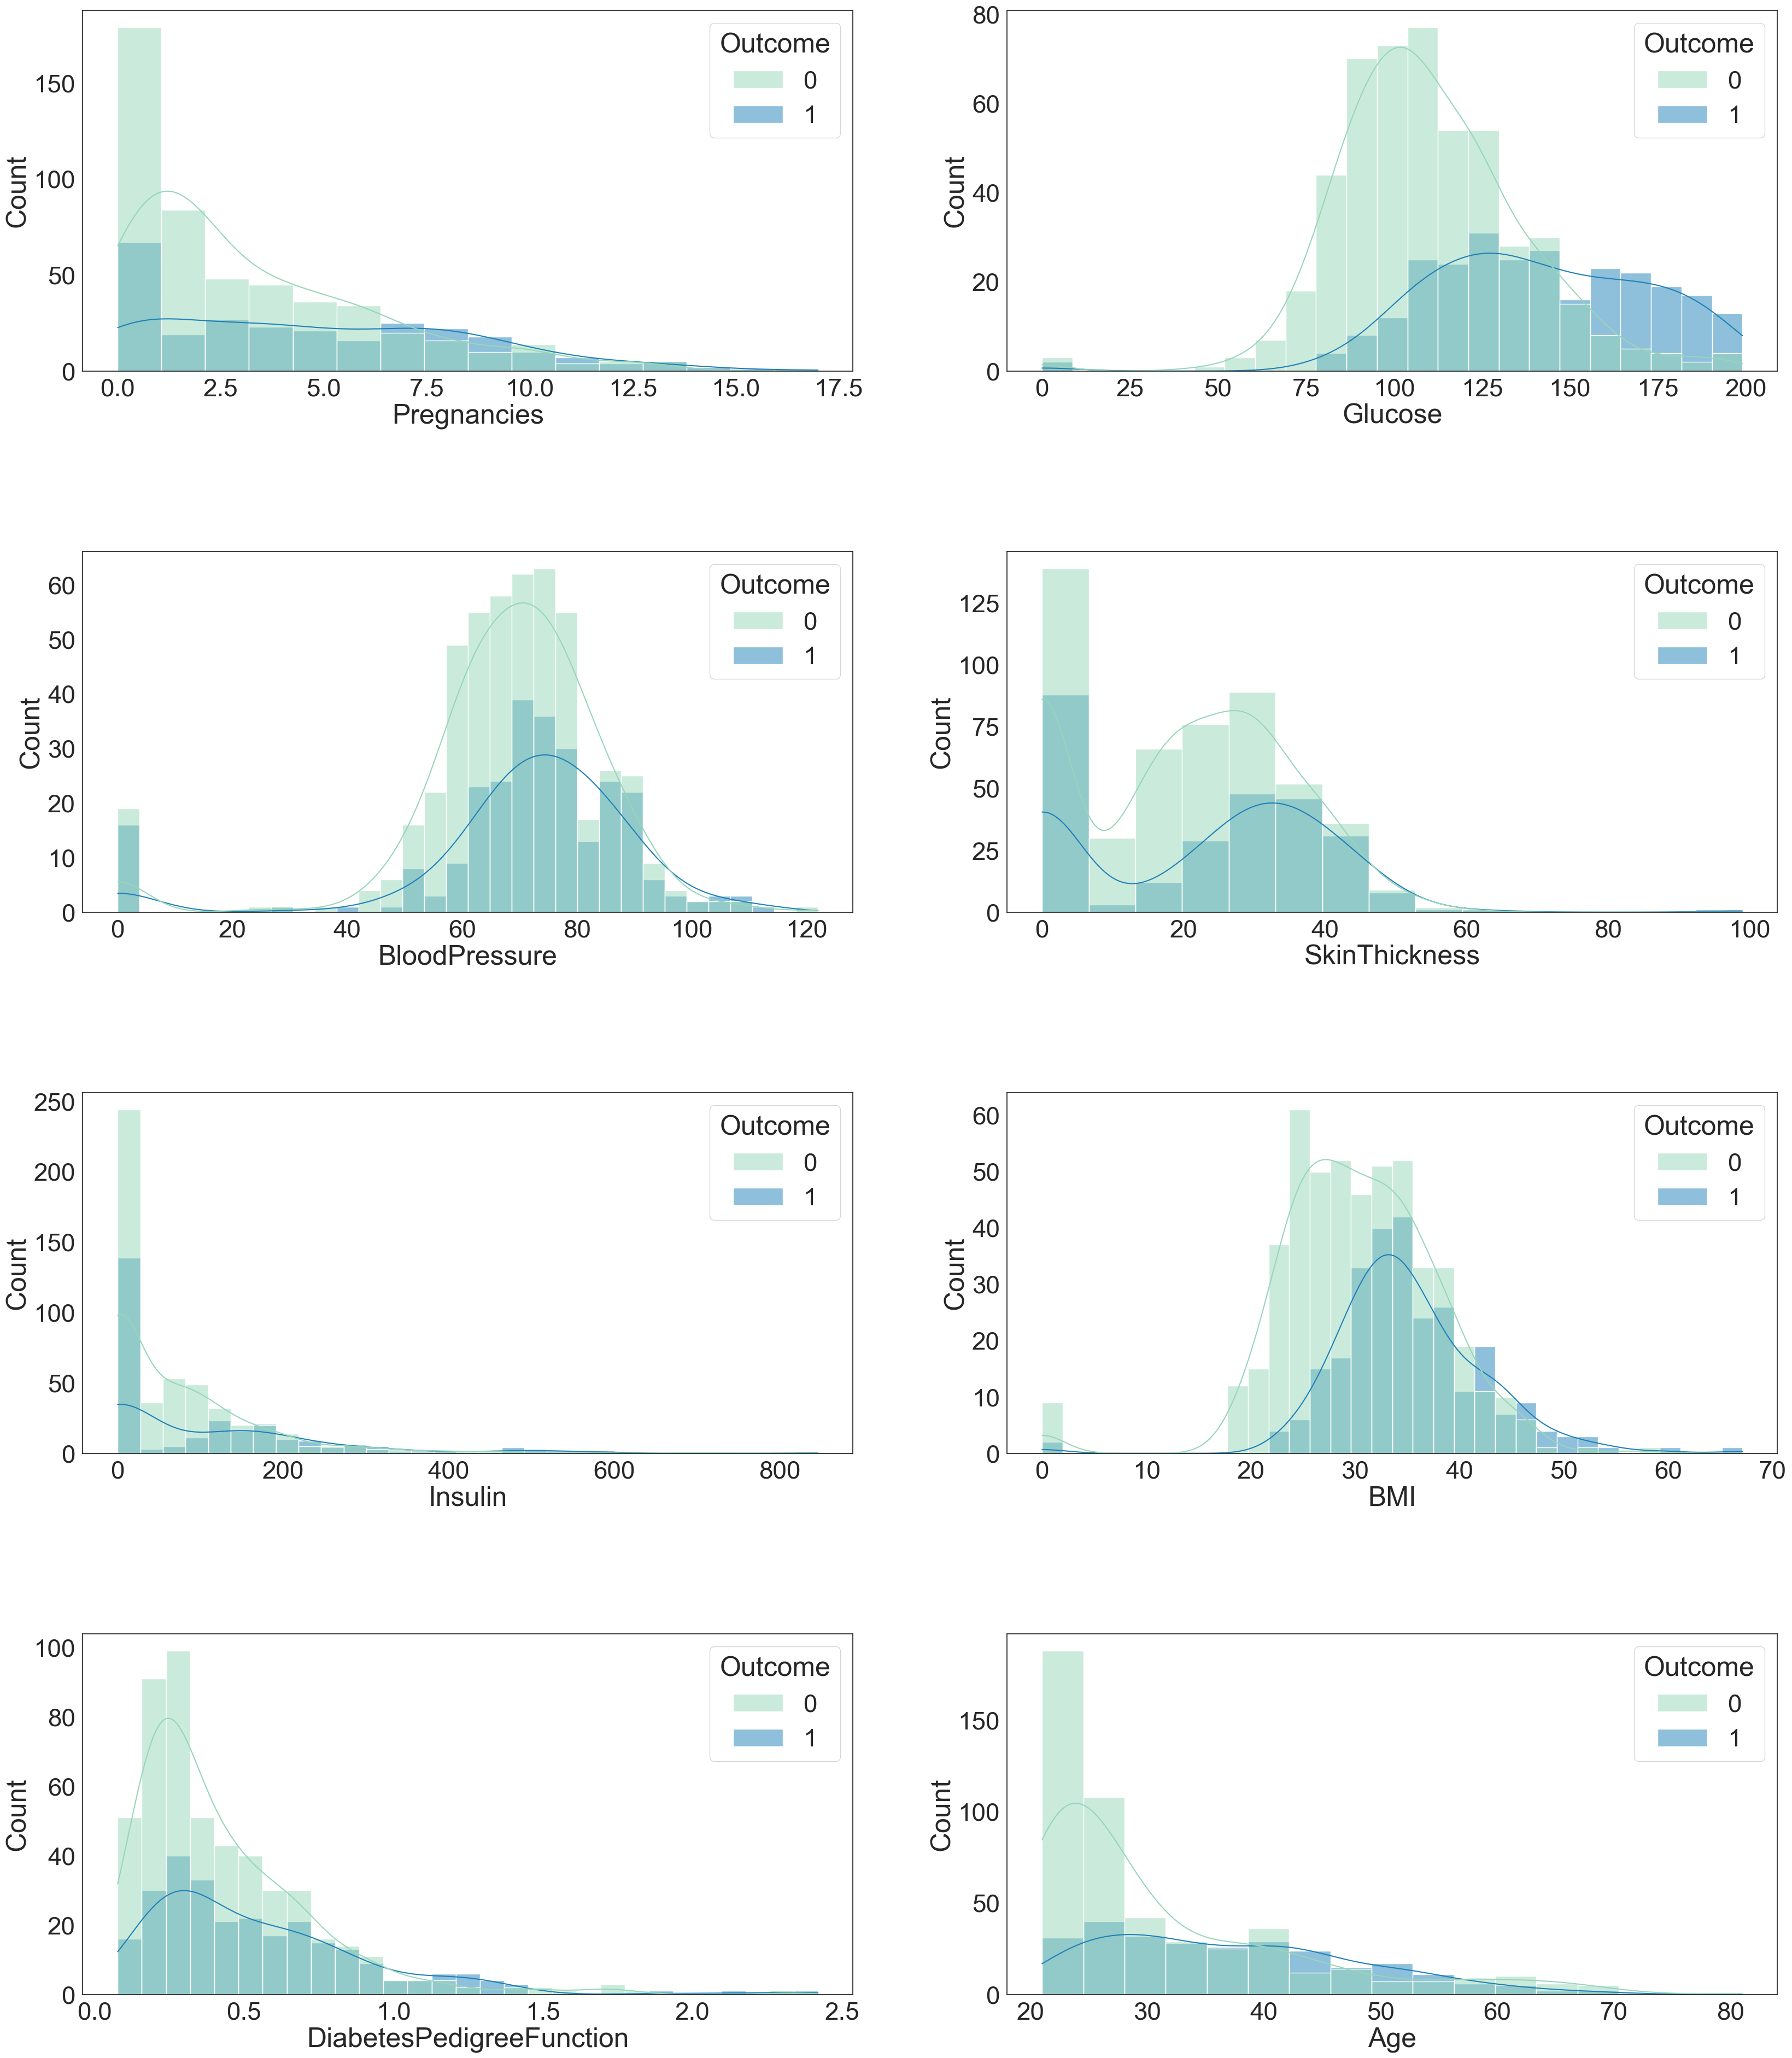

In [18]:
rcParams['figure.figsize'] = 40,60
sns.set(font_scale = 3)
sns.set_style("white")
sns.set_palette("bright")
plt.subplots_adjust(hspace=0.5)
i = 1;
for name in feature_columns:
    plt.subplot(5,2,i)
    sns.histplot(data=df, x=name, hue="Outcome",kde=True,palette="YlGnBu")
    i = i + 1

Based on the visualizations above, it would be beneficial to replace the zero values in each feature with more appropriate values. 
To begin, let’s determine the proportion of zero values present in each feature.

In [20]:
zero_features = ['Pregnancies','Glucose','BloodPressure','SkinThickness',"Insulin",'BMI']
total_count = df['Glucose'].count()

for feature in zero_features:
    zero_count = df[df[feature]==0][feature].count()
    print('{0} 0 number of cases {1}, percent is {2:.2f} %'.format(feature, zero_count, 100*zero_count/total_count))

Pregnancies 0 number of cases 111, percent is 14.45 %
Glucose 0 number of cases 5, percent is 0.65 %
BloodPressure 0 number of cases 35, percent is 4.56 %
SkinThickness 0 number of cases 227, percent is 29.56 %
Insulin 0 number of cases 374, percent is 48.70 %
BMI 0 number of cases 11, percent is 1.43 %


# FINDING COORELATION BETWEEN THE COLUMNS

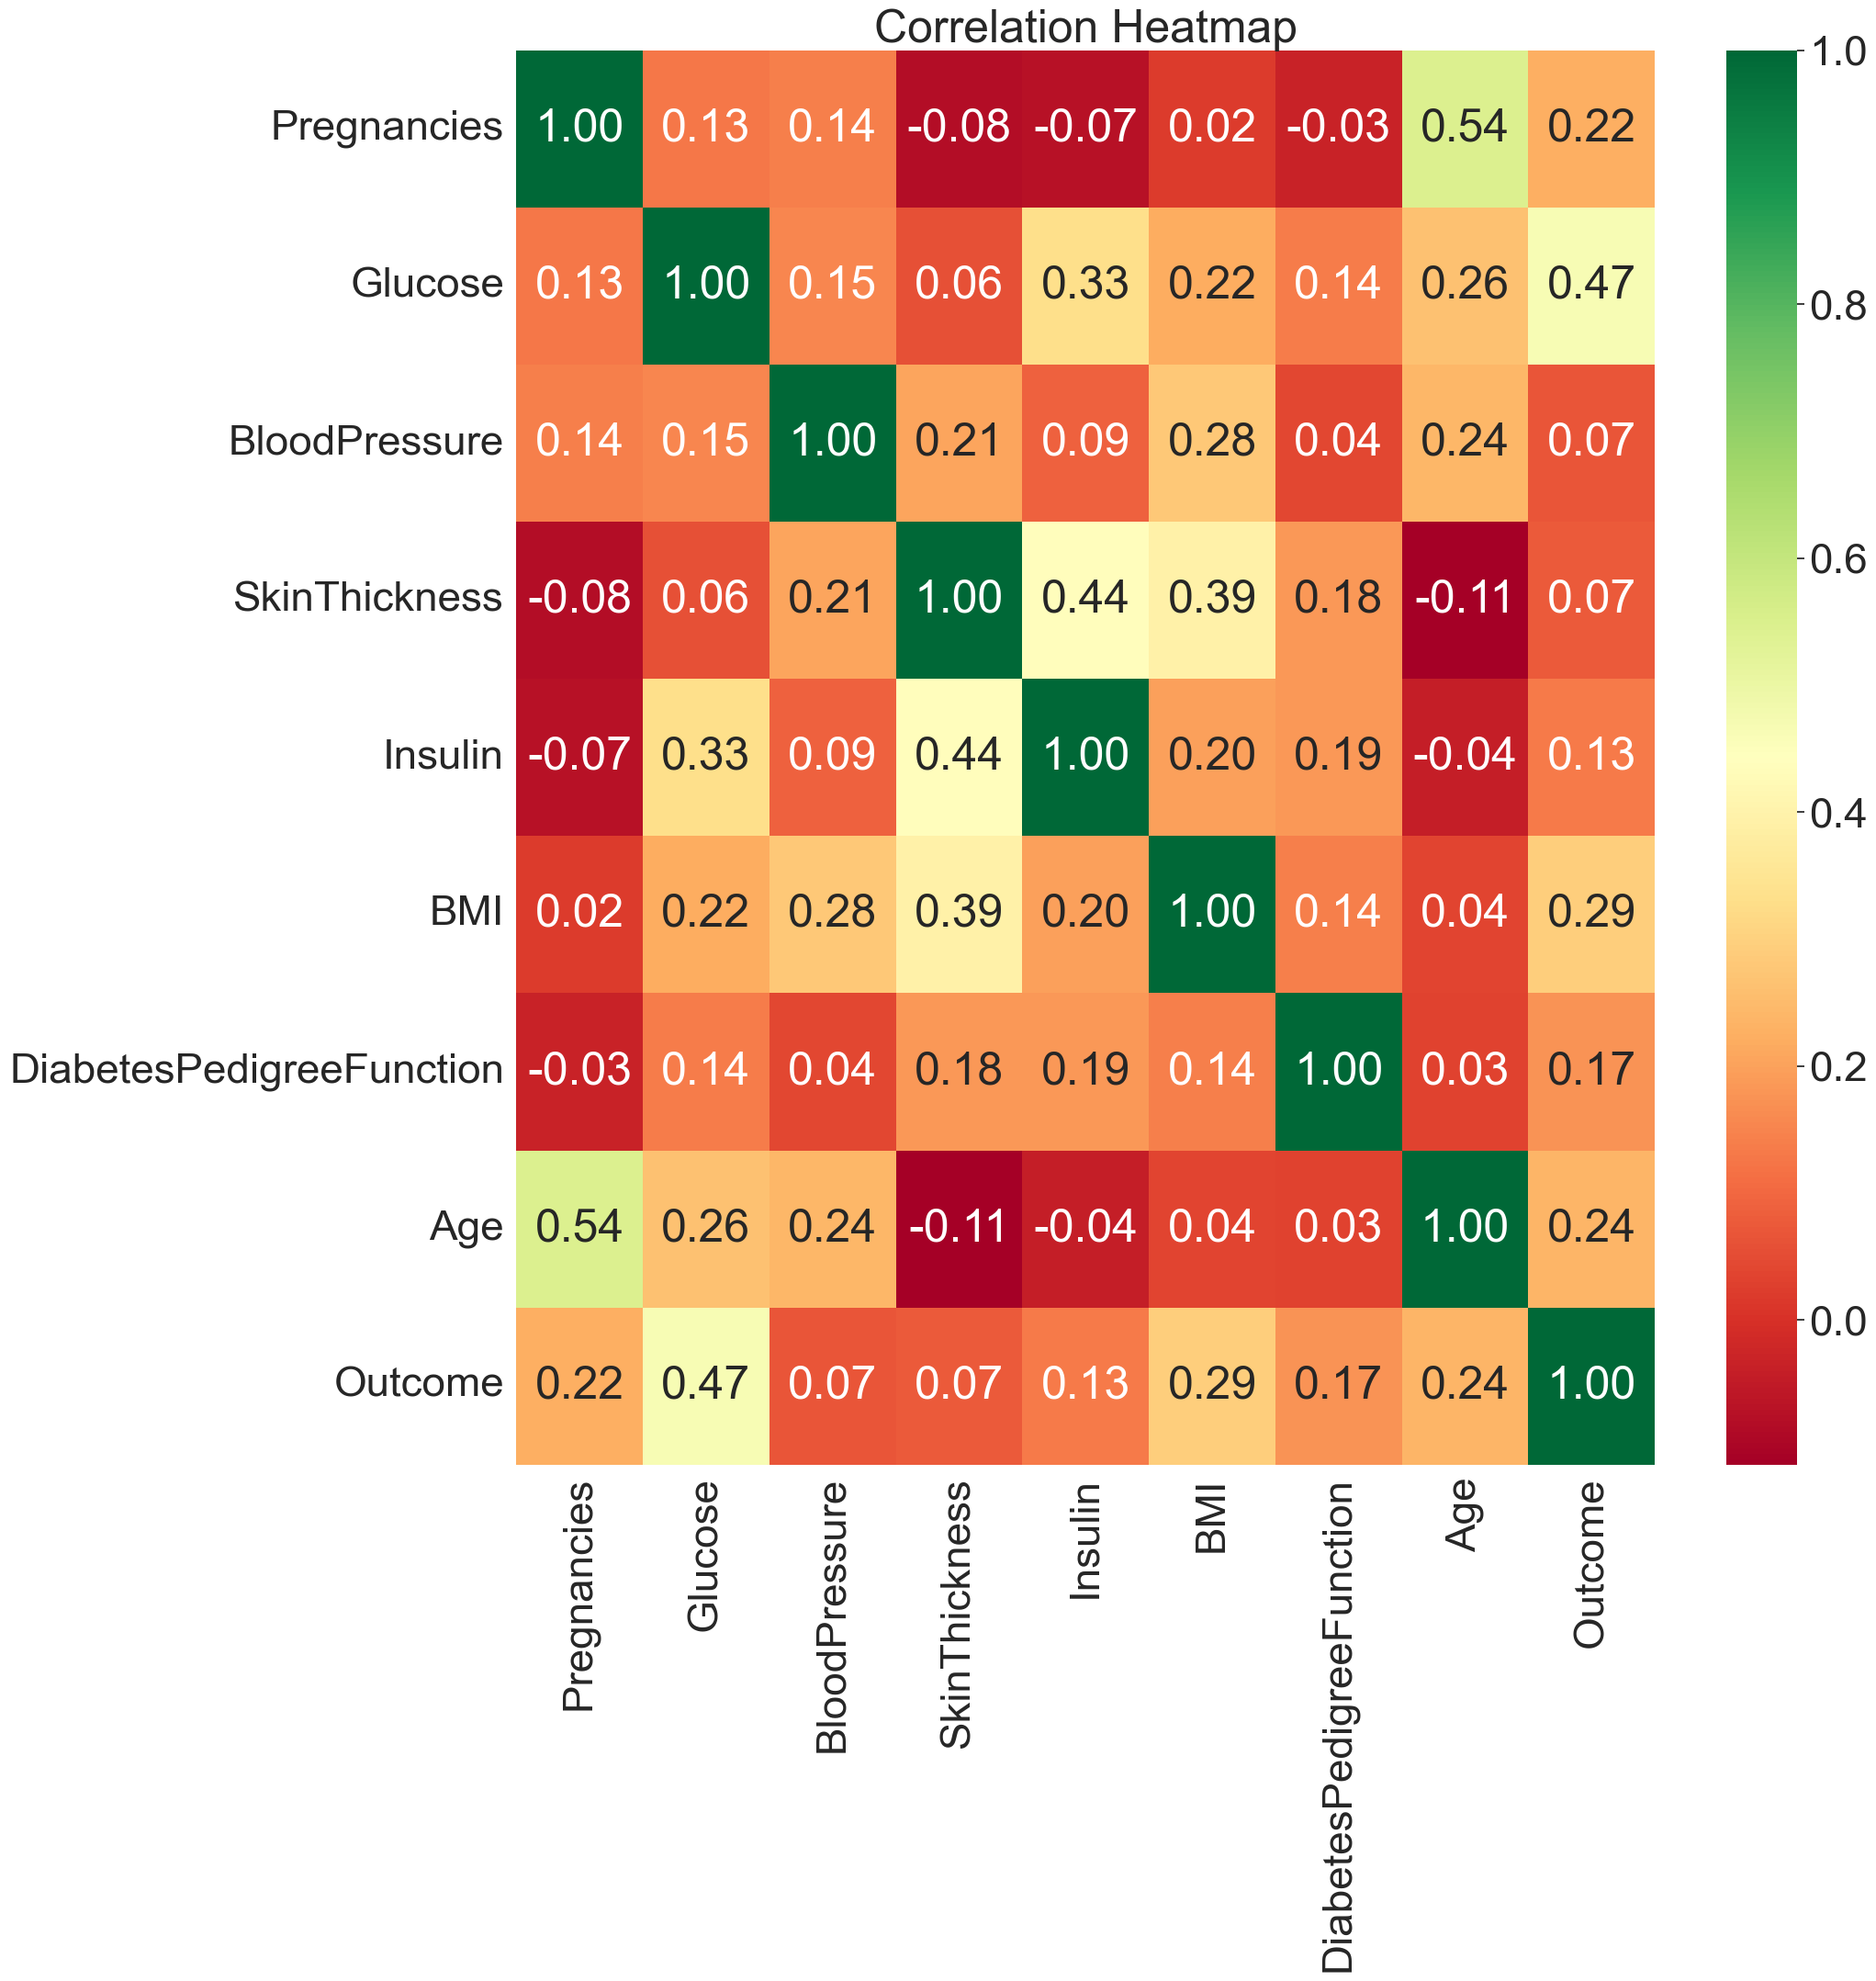

In [22]:
corrmat = df.corr()
plt.figure(figsize=(20, 20))
sns.heatmap(corrmat, annot=True, cmap="RdYlGn", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

In [23]:
# Replace zeros in specific columns with NaN
columns_with_zeros = ["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI"]
df[columns_with_zeros] = df[columns_with_zeros].replace(0, pd.NA)

In [24]:
# Handle missing values by imputing with the median
df.fillna(df.median(), inplace=True)

# SPLITTING THE DATA INTO TRAINING AND TESTING DATA FOR MODEL CLASSIFICAITON 

In [26]:
from sklearn.model_selection import train_test_split
X = df.drop(columns=["Outcome"])
y = df["Outcome"]

In [27]:
X.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6    148.0           72.0           35.0    125.0  33.6   
1            1     85.0           66.0           29.0    125.0  26.6   
2            8    183.0           64.0           29.0    125.0  23.3   
3            1     89.0           66.0           23.0     94.0  28.1   
4            0    137.0           40.0           35.0    168.0  43.1   

   DiabetesPedigreeFunction  Age  
0                     0.627   50  
1                     0.351   31  
2                     0.672   32  
3                     0.167   21  
4                     2.288   33

In [28]:
y.head()

0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64

In [29]:
# Split data for classification
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [30]:
X_train

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
353            1     90.0           62.0           12.0     43.0  27.2   
711            5    126.0           78.0           27.0     22.0  29.6   
373            2    105.0           58.0           40.0     94.0  34.9   
46             1    146.0           56.0           29.0    125.0  29.7   
682            0     95.0           64.0           39.0    105.0  44.6   
..           ...      ...            ...            ...      ...   ...   
451            2    134.0           70.0           29.0    125.0  28.9   
113            4     76.0           62.0           29.0    125.0  34.0   
556            1     97.0           70.0           40.0    125.0  38.1   
667           10    111.0           70.0           27.0    125.0  27.5   
107            4    144.0           58.0           28.0    140.0  29.5   

     DiabetesPedigreeFunction  Age  
353                     0.580   24  
711                     0.439   40  
373                     0.225   25  
46                      0.564   29  
682                     0.366   22  
..                        ...  ...  
451                     0.542   23  
113                     0.391   25  
556                     0.218   30  
667                     0.141   40  
107                     0.287   37  

[614 rows x 8 columns]

In [31]:
y_train

353    0
711    0
373    0
46     0
682    0
      ..
451    1
113    0
556    0
667    1
107    0
Name: Outcome, Length: 614, dtype: int64

Scale the features for consistency in clustering and model training

# Scale data for Clustering

In [34]:

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

X_train_scaled


array([[0.05882353, 0.23776224, 0.3877551 , ..., 0.18404908, 0.22093541,
        0.05      ],
       [0.29411765, 0.48951049, 0.55102041, ..., 0.23312883, 0.15812918,
        0.31666667],
       [0.11764706, 0.34265734, 0.34693878, ..., 0.34151329, 0.06280624,
        0.06666667],
       ...,
       [0.05882353, 0.28671329, 0.46938776, ..., 0.40695297, 0.0596882 ,
        0.15      ],
       [0.58823529, 0.38461538, 0.46938776, ..., 0.19018405, 0.02538976,
        0.31666667],
       [0.23529412, 0.61538462, 0.34693878, ..., 0.23108384, 0.09042316,
        0.26666667]])

In [35]:
print("Data type of X_train_scaled:", type(X_train_scaled))

Data type of X_train_scaled: <class 'numpy.ndarray'>


In [39]:
# Print summary of processed data
print("Training set shape:", X_train_scaled.shape)
print("Testing set shape:", X_test_scaled.shape)
print("Dataset shape after scaling (for clustering):", X_train_scaled.shape)

Training set shape: (614, 8)
Testing set shape: (154, 8)
Dataset shape after scaling (for clustering): (614, 8)


In [41]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_scaled, y_train)
rf_predictions = rf_model.predict(X_test_scaled)
rf_predictions

array([1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1,
       0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0],
      dtype=int64)

In [43]:
#from sklearn.externals import joblib
import pickle

# Save the model using pickle
with open('rf_model.pkl', 'wb') as model_file:
    pickle.dump(rf_model, model_file)

In [45]:
print("Random Forest Classification Report:")
print(classification_report(y_test, rf_predictions))

Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.78      0.80       100
           1       0.62      0.67      0.64        54

    accuracy                           0.74       154
   macro avg       0.72      0.72      0.72       154
weighted avg       0.75      0.74      0.74       154



In [47]:
print("Random Forest Confusion Matrix:")
print(confusion_matrix(y_test, rf_predictions))

Random Forest Confusion Matrix:
[[78 22]
 [18 36]]


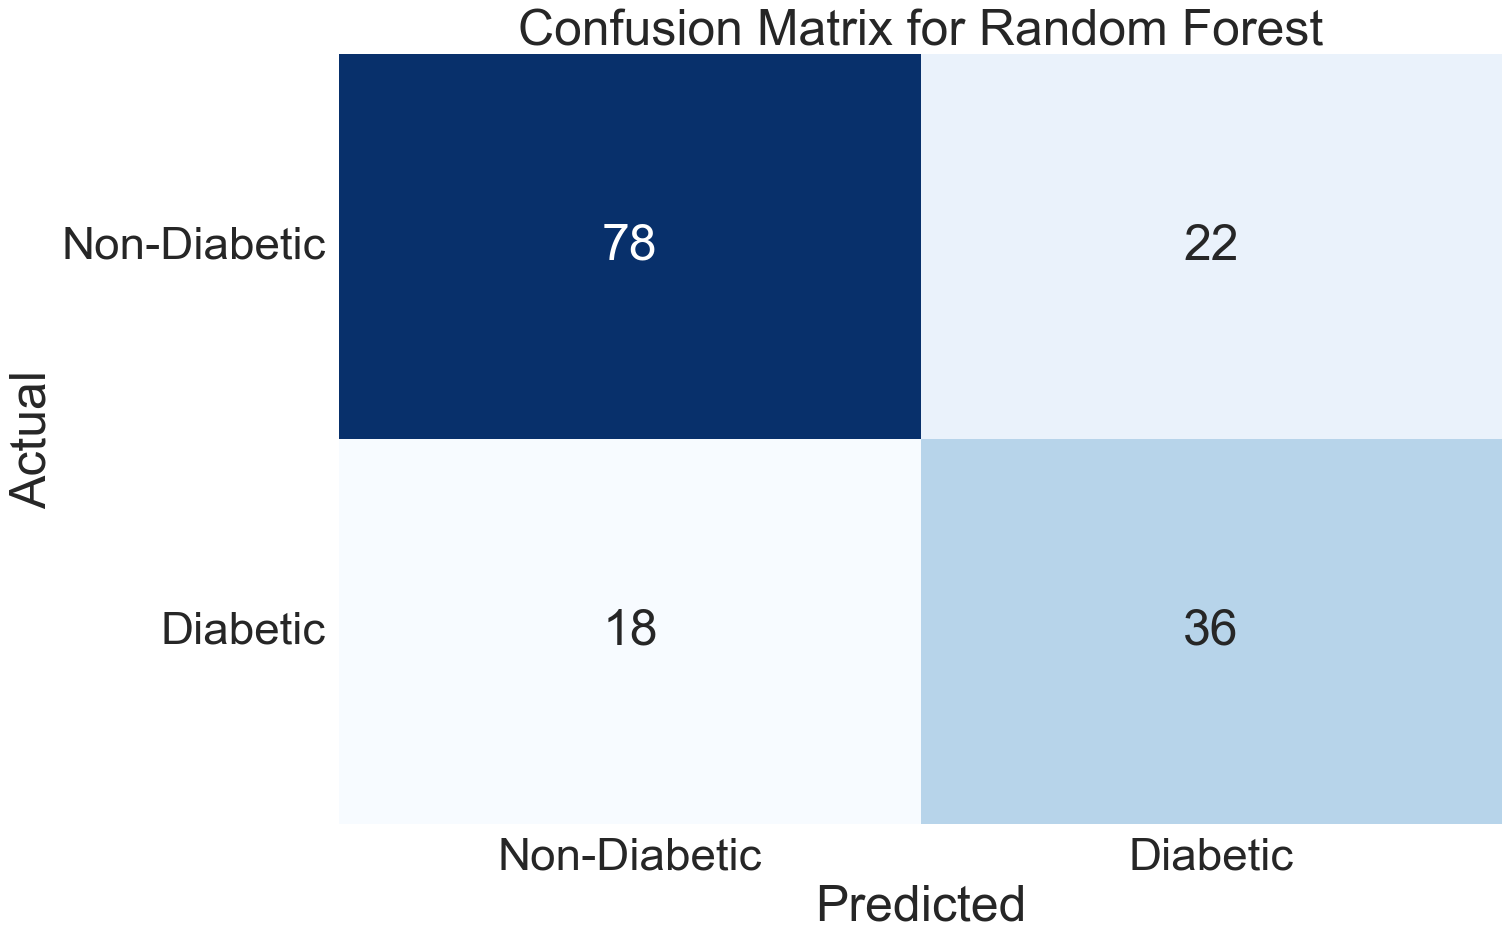

In [49]:
from sklearn.metrics import classification_report, confusion_matrix
# Random Forest Confusion Matrix
conf_matrix_rf = confusion_matrix(y_test, rf_predictions)

# Plot confusion matrix using seaborn
plt.figure(figsize=(15, 10))
sns.heatmap(conf_matrix_rf, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix for Random Forest')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.xticks([0.5, 1.5], ['Non-Diabetic', 'Diabetic'])
plt.yticks([0.5, 1.5], ['Non-Diabetic', 'Diabetic'], rotation=0)
plt.show()

In [51]:
# Add a new column 'predicted' to the test set
X_test['rf_predicted'] = rf_predictions
X_test

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
44             7    159.0           64.0           29.0    125.0  27.4   
672           10     68.0          106.0           23.0     49.0  35.5   
700            2    122.0           76.0           27.0    200.0  35.9   
630            7    114.0           64.0           29.0    125.0  27.4   
81             2     74.0           72.0           29.0    125.0  32.3   
..           ...      ...            ...            ...      ...   ...   
32             3     88.0           58.0           11.0     54.0  24.8   
637            2     94.0           76.0           18.0     66.0  31.6   
593            2     82.0           52.0           22.0    115.0  28.5   
425            4    184.0           78.0           39.0    277.0  37.0   
273            1     71.0           78.0           50.0     45.0  33.2   

     DiabetesPedigreeFunction  Age  rf_predicted  
44                      0.294   40             1  
672                     0.285   47             0  
700                     0.483   26             0  
630                     0.732   34             0  
81                      0.102   22             0  
..                        ...  ...           ...  
32                      0.267   22             0  
637                     0.649   23             0  
593                     1.699   25             0  
425                     0.264   31             1  
273                     0.422   21             0  

[154 rows x 9 columns]

In [53]:
df[['Age', 'Glucose']].dtypes

Age          int64
Glucose    float64
dtype: object

In [55]:
# Label Encoding
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
label_encoder = LabelEncoder()
data_encoded_label = df.copy()
data_encoded_label['target_label_encoded'] = label_encoder.fit_transform(df['Outcome'])
data_encoded_label

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6    148.0           72.0           35.0    125.0  33.6   
1              1     85.0           66.0           29.0    125.0  26.6   
2              8    183.0           64.0           29.0    125.0  23.3   
3              1     89.0           66.0           23.0     94.0  28.1   
4              0    137.0           40.0           35.0    168.0  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10    101.0           76.0           48.0    180.0  32.9   
764            2    122.0           70.0           27.0    125.0  36.8   
765            5    121.0           72.0           23.0    112.0  26.2   
766            1    126.0           60.0           29.0    125.0  30.1   
767            1     93.0           70.0           31.0    125.0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  target_label_encoded  
0                       0.627   50        1                     1  
1                       0.351   31        0                     0  
2                       0.672   32        1                     1  
3                       0.167   21        0                     0  
4                       2.288   33        1                     1  
..                        ...  ...      ...                   ...  
763                     0.171   63        0                     0  
764                     0.340   27        0                     0  
765                     0.245   30        0                     0  
766                     0.349   47        1                     1  
767                     0.315   23        0                     0  

[768 rows x 10 columns]

In [63]:
# K-means Clustering
kmeans = KMeans(n_clusters=3, random_state=42)
cluster = kmeans.fit_predict(df.drop('Outcome', axis=1))
df["cluster"] =  kmeans.fit_predict(df.drop('Outcome', axis=1))
df

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6    148.0           72.0           35.0    125.0  33.6   
1              1     85.0           66.0           29.0    125.0  26.6   
2              8    183.0           64.0           29.0    125.0  23.3   
3              1     89.0           66.0           23.0     94.0  28.1   
4              0    137.0           40.0           35.0    168.0  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10    101.0           76.0           48.0    180.0  32.9   
764            2    122.0           70.0           27.0    125.0  36.8   
765            5    121.0           72.0           23.0    112.0  26.2   
766            1    126.0           60.0           29.0    125.0  30.1   
767            1     93.0           70.0           31.0    125.0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  cluster  
0                       0.627   50        1        1  
1                       0.351   31        0        1  
2                       0.672   32        1        1  
3                       0.167   21        0        1  
4                       2.288   33        1        1  
..                        ...  ...      ...      ...  
763                     0.171   63        0        1  
764                     0.340   27        0        1  
765                     0.245   30        0        1  
766                     0.349   47        1        1  
767                     0.315   23        0        1  

[768 rows x 10 columns]

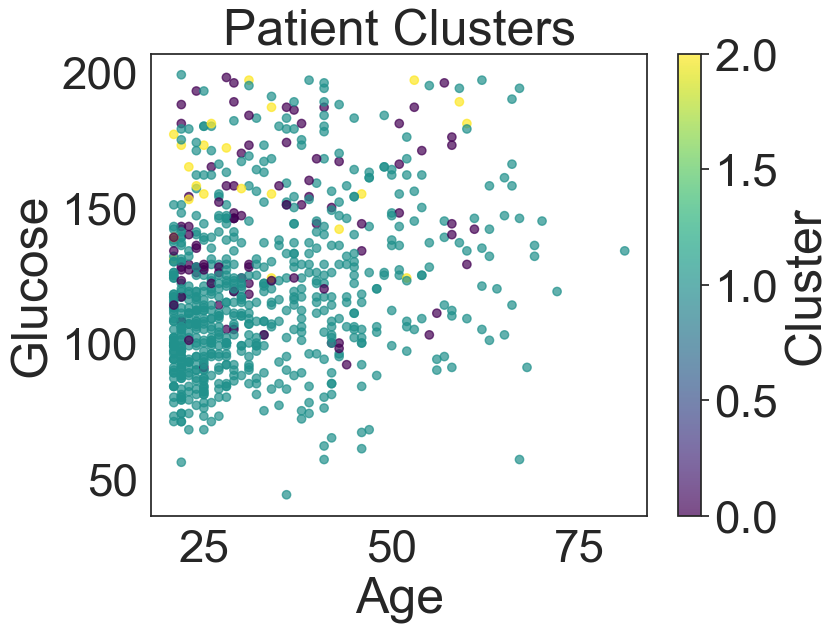

In [65]:
# Visualize clusters (e.g., using Age and Glucose)
plt.figure(figsize=(8, 6))
plt.scatter(df['Age'], df['Glucose'], c=cluster, cmap='viridis', alpha=0.7)
plt.colorbar(label='Cluster')
plt.xlabel('Age')
plt.ylabel('Glucose')
plt.title('Patient Clusters')
plt.show()

In [61]:
# Analyze cluster characteristics
cluster_analysis = df.groupby('cluster').mean()
print("Cluster Characteristics:\n", cluster_analysis)

Cluster Characteristics:
          Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
cluster                                                                      
0           3.566667  143.133333      73.800000      31.877778  242.477778   
1           3.896341  117.324695      72.227134      28.583841  113.929878   
2           3.454545  162.954545      71.363636      33.409091  521.590909   

               BMI  DiabetesPedigreeFunction        Age   Outcome  
cluster                                                            
0        35.428889                  0.591978  34.211111  0.522222  
1        31.932165                  0.450364  33.102134  0.317073  
2        35.886364                  0.622000  33.409091  0.590909  


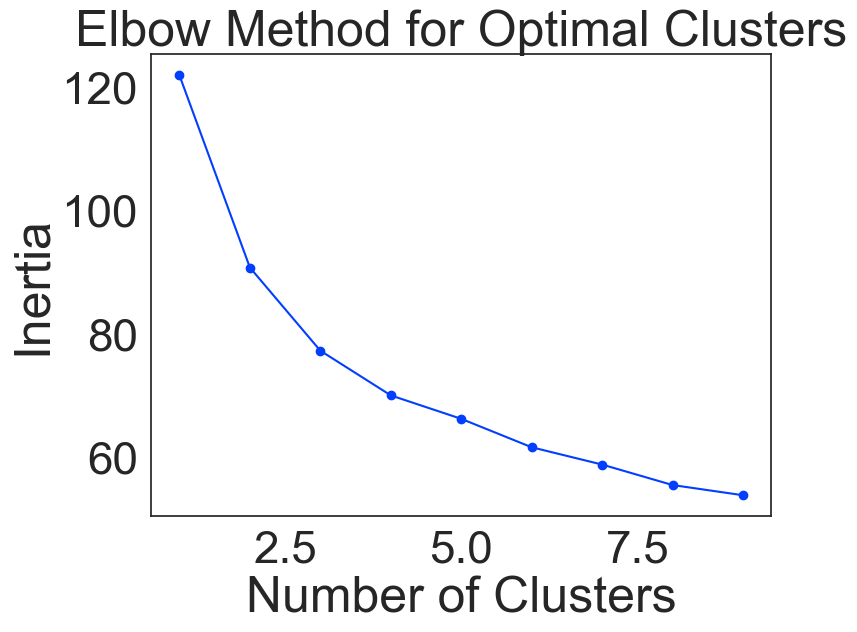

In [69]:
inertia = []
cluster_range = range(1, 10)

# Calculate inertia for each number of clusters
for k in cluster_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_train_scaled)
    inertia.append(kmeans.inertia_)

# Plot the elbow curve
plt.figure(figsize=(8, 6))
plt.plot(cluster_range, inertia, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal Clusters')
plt.show()


In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Train Random Forest Classifier
rf = RandomForestClassifier(random_state=42)
rf.fit(X_scaled, cluster)

# Feature importance
feature_importances = pd.Series(rf.feature_importances_, index=X.columns)
feature_importances.sort_values(ascending=False).plot(kind='bar', figsize=(10, 6), title='Feature Importance')
plt.ylabel('Importance')
plt.show()